In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score,precision_score,accuracy_score,confusion_matrix

model = SVC(kernel= "linear")
ln = LabelEncoder()
warnings.filterwarnings("ignore")

In [49]:

def res(y_test,y_pred):
    print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
    print("Precision        : ",round(precision_score(y_test,y_pred),4))
    print("Recall           : ",round(recall_score(y_test,y_pred),4))
    print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
    print("Confusion Matrix :")
    plt.figure(figsize = (8,6))
    confu_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            )

In [2]:
sal_data = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
sal_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
sal_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
sal_data["workclass"] = ln.fit_transform(sal_data["workclass"])
sal_data["education"] = ln.fit_transform(sal_data["education"])
sal_data["maritalstatus"] = ln.fit_transform(sal_data["maritalstatus"])
sal_data["occupation"] = ln.fit_transform(sal_data["occupation"])
sal_data["relationship"] = ln.fit_transform(sal_data["relationship"])
sal_data["race"] = ln.fit_transform(sal_data["race"])
sal_data["native"] = ln.fit_transform(sal_data["native"])
sal_data["Salary"] = ln.fit_transform(sal_data["Salary"])
sal_data["sex"] = ln.fit_transform(sal_data["sex"])

In [6]:
sal_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [42]:
x = sal_data.drop(labels="Salary" , axis = 1)
y = sal_data[["Salary"]]

In [43]:
x = x.iloc[0:30000,:]
y = y.iloc[0:30000,:]

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify= y)

In [45]:
x_train.shape

(24000, 13)

Overall Accuracy :  0.7738
Precision        :  0.9791
Recall           :  0.094
AUC Score        :  0.5467
Confusion Matrix :
Wall time: 33.1 s


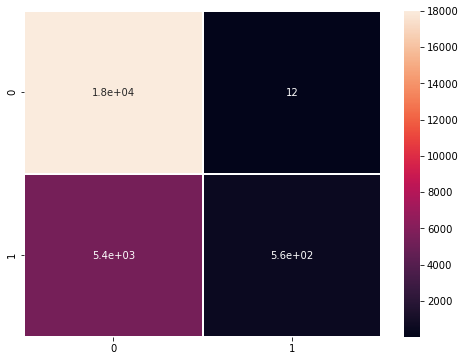

In [46]:
%%time
model = SVC(kernel = "poly")
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
res(y_train,y_train_pred)


Overall Accuracy :  0.7962
Precision        :  0.7446
Recall           :  0.2765
AUC Score        :  0.6225
Confusion Matrix :
Wall time: 1min 8s


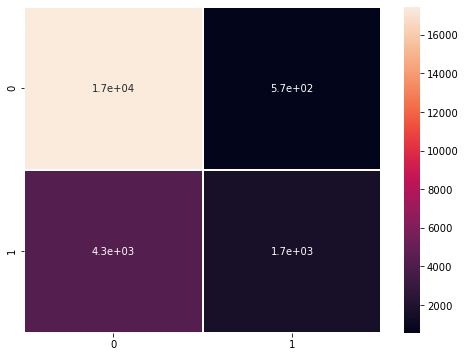

In [47]:
%%time
model = SVC(kernel = "rbf")
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
res(y_train,y_train_pred)

Overall Accuracy :  0.7568
Precision        :  0.5264
Recall           :  0.2352
AUC Score        :  0.5825
Confusion Matrix :
Wall time: 1min


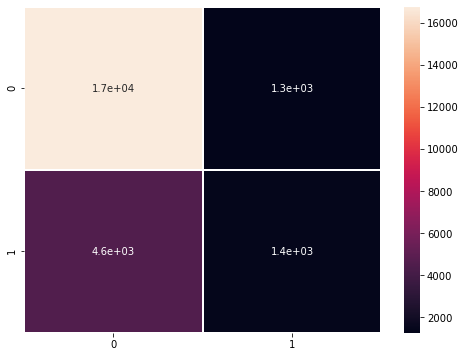

In [48]:
%%time
model = SVC(kernel = "sigmoid")
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
res(y_train,y_train_pred)

### For slpited Test Data

Overall Accuracy :  0.7558
Precision        :  0.5229
Recall           :  0.2288
AUC Score        :  0.5798
Confusion Matrix :
Wall time: 30.2 s


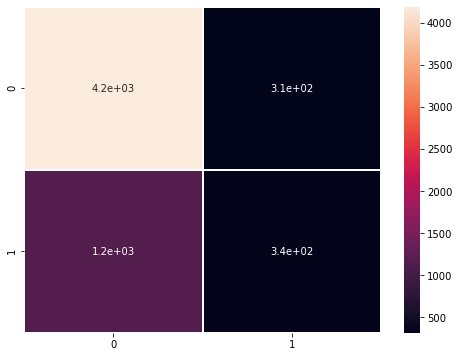

In [50]:
%%time
model = SVC(kernel = "sigmoid"`)
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
res(y_test,y_test_pred)

[LibSVM]Overall Accuracy :  0.7948
Precision        :  0.75
Recall           :  0.2649
AUC Score        :  0.6178
Confusion Matrix :
Wall time: 35.6 s


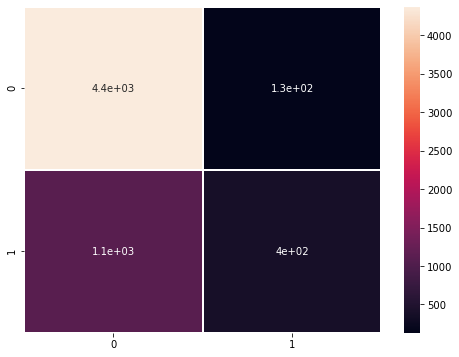

In [53]:
%%time
model = SVC(kernel = "rbf",verbose=True)
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
res(y_test,y_test_pred)

### For Given Test Data outside

In [57]:
sal_data_test = pd.read_csv("SalaryData_Test(1).csv")
sal_data_test["workclass"] = ln.fit_transform(sal_data_test["workclass"])
sal_data_test["education"] = ln.fit_transform(sal_data_test["education"])
sal_data_test["maritalstatus"] = ln.fit_transform(sal_data_test["maritalstatus"])
sal_data_test["occupation"] = ln.fit_transform(sal_data_test["occupation"])
sal_data_test["relationship"] = ln.fit_transform(sal_data_test["relationship"])
sal_data_test["race"] = ln.fit_transform(sal_data_test["race"])
sal_data_test["native"] = ln.fit_transform(sal_data_test["native"])
sal_data_test["Salary"] = ln.fit_transform(sal_data_test["Salary"])
sal_data_test["sex"] = ln.fit_transform(sal_data_test["sex"])

In [60]:
x_givn_test = sal_data_test.drop(labels="Salary" , axis = 1)
y_givn_test = sal_data_test[["Salary"]]

Overall Accuracy :  0.7964
Precision        :  0.7331
Recall           :  0.2695
AUC Score        :  0.6188
Confusion Matrix :
Wall time: 51.3 s


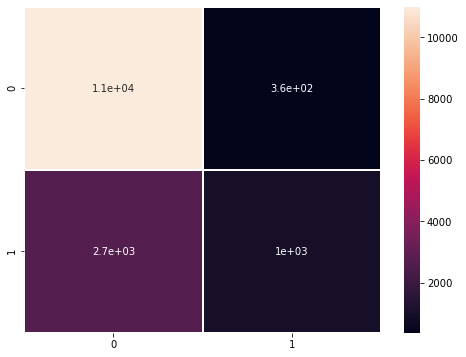

In [61]:
%%time
model = SVC(kernel = "rbf")
model.fit(x_train,y_train)
y_test_pred = model.predict(x_givn_test)
res(y_givn_test,y_test_pred)

Overall Accuracy :  0.7766
Precision        :  0.9912
Recall           :  0.0916
AUC Score        :  0.5457
Confusion Matrix :
Wall time: 27.6 s


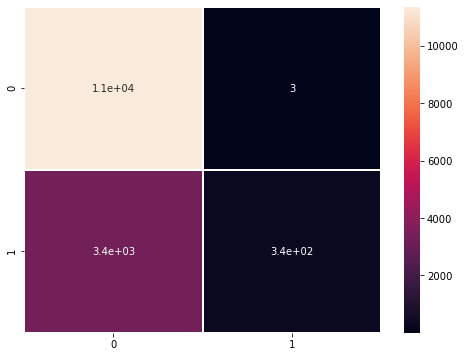

In [62]:
%%time
model = SVC(kernel = "poly")
model.fit(x_train,y_train)
y_test_pred = model.predict(x_givn_test)
res(y_givn_test,y_test_pred)
